In [1]:
import pandas as pd
import evaluation_helper as eval
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


count = 50
                     
# Read in data
files = []
predictions = []
for i in range(count):
    file = pd.read_csv('./maps/nn_output/probabilities' + str(i) + '.csv', sep=';')
    predictions.append(file['prediction'].values)
    
averages = []

for i in range (count):
    suma = 0
    for j in range(count):
        suma += predictions[i][j]
    averages.append(suma/count)

In [2]:
relationships = []
for i in range (count):
    relationship = []
    for j in range(count):
        relationship.append(predictions[i][j]/averages[i])
    relationships.append(relationship)
    
relationships

[[0.4957517784676831,
  1.066443272355139,
  1.0980371182845872,
  1.2553417979681034,
  1.2670007323769197,
  1.2238988675823705,
  1.3158142572760114,
  1.0800709119371632,
  1.1294561244180852,
  1.3491396067877934,
  1.058599632559769,
  0.8602466052960087,
  1.0351983123220192,
  1.0347256099164959,
  0.7813809881156109,
  0.9550368737356429,
  1.117867148604665,
  0.8553516012422651,
  1.0580200080222215,
  0.9080173842914312,
  1.0639913199638111,
  0.9276531292740506,
  0.8112618122310392,
  0.9060560491485324,
  0.8479186989052806,
  1.0382229727609125,
  1.0490234687163302,
  0.8592755754565018,
  0.999580656613915,
  0.9555064013588795,
  0.8975062470644604,
  0.7793252031996726,
  0.9989628213038415,
  0.9633140980833568,
  0.8840820203189694,
  0.9838998399728313,
  0.9156189469374145,
  0.9842754847484366,
  0.731162622054505,
  0.78973486077854,
  1.1632358079521585,
  1.2045289539237498,
  0.8464355653443669,
  1.2923951355804382,
  1.1067088093314652,
  1.1412681286871

In [3]:
labels = [str(i) for i in range(50)]
labels

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49']

In [4]:
df = pd.DataFrame(relationships, columns=labels)

corr = df.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.450950,0.069309,0.243890,0.446591,0.077723,0.096563,0.461726,0.077493,-0.184138,...,-0.419929,0.195272,0.544068,-0.408950,0.203684,0.170809,-0.528377,-0.487903,-0.186478,-0.217665
1,0.450950,1.000000,0.292866,0.328870,0.407848,0.435335,0.113016,0.482827,0.462177,0.278659,...,-0.285831,-0.351001,0.101671,-0.453916,-0.196234,-0.202424,-0.198572,-0.256571,-0.368801,-0.007948
2,0.069309,0.292866,1.000000,0.169894,0.285425,0.173514,0.491391,0.329744,0.433153,0.408332,...,0.254837,-0.077022,0.038920,0.209996,0.115925,-0.144719,0.457538,0.178371,0.376135,-0.002739
3,0.243890,0.328870,0.169894,1.000000,0.568969,0.653554,0.579622,0.615448,0.567953,0.571437,...,-0.178684,-0.144845,-0.304117,-0.120116,-0.373141,0.115031,-0.082728,-0.078172,-0.028018,-0.016677
4,0.446591,0.407848,0.285425,0.568969,1.000000,0.582333,0.459411,0.472560,0.522382,0.443005,...,-0.266597,-0.053161,-0.108741,-0.055250,-0.099715,-0.021659,-0.175319,-0.214872,-0.157911,-0.216579
5,0.077723,0.435335,0.173514,0.653554,0.582333,1.000000,0.570159,0.529055,0.725258,0.678477,...,-0.330727,-0.448777,-0.434453,-0.089633,-0.453119,-0.286613,-0.098892,-0.168615,-0.229279,-0.243826
6,0.096563,0.113016,0.491391,0.579622,0.459411,0.570159,1.000000,0.547896,0.583260,0.492473,...,0.039170,-0.089455,-0.263899,0.188532,-0.204503,-0.014742,0.261934,0.022900,0.335961,0.016924
7,0.461726,0.482827,0.329744,0.615448,0.472560,0.529055,0.547896,1.000000,0.569949,0.468431,...,-0.329861,-0.267835,-0.035000,-0.186210,-0.255284,-0.106764,-0.091383,-0.335511,-0.043285,-0.118287
8,0.077493,0.462177,0.433153,0.567953,0.522382,0.725258,0.583260,0.569949,1.000000,0.696846,...,-0.118105,-0.354092,-0.289643,0.017427,-0.402228,-0.263061,0.032122,-0.053049,0.009253,-0.139561
9,-0.184138,0.278659,0.408332,0.571437,0.443005,0.678477,0.492473,0.468431,0.696846,1.000000,...,-0.032356,-0.513767,-0.554740,0.147188,-0.488585,-0.271032,0.237544,-0.028137,-0.102548,-0.165270


In [5]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

In [20]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.7) & (links['var1'] != links['var2']) ]
# links_filtered
# links_filtered[links_filtered.var1 == 'Senegal']

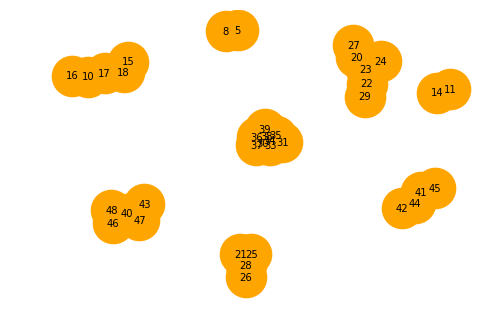

In [21]:
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=1000, edge_color='black', linewidths=10, font_size=10)